In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

In [63]:
dict = {
    "<PAD>": 0,"<UNK>": 1,"<START>": 2,"<STOP>": 3,"(": 4,")": 5,"1": 6,"2": 7,"3": 8,"4": 9,"5": 10,"6": 11,"7": 12,"8": 13,"9": 14,"%10": 15,"%11": 16,"%12": 17,"%13": 18,"%14": 19,"%15": 20,"%16": 21,"%17": 22,"%18": 23,"%19": 24,"%20": 25,"%21": 26,"%22": 27,"%23": 28,"%24": 29,"%25": 30,"%26": 31,"%27": 32,"%28": 33,"%29": 34,"O": 35,"N": 36,"=": 37,"C": 38," ": 39,"Cl": 40,".": 41,"[Pt]": 42,"F": 43,"S": 44,"#": 45,"I": 46,"[Pt+2]": 47,"[NH-]": 48,"[O-]": 49,"[N+]": 50,"B": 51,"P": 52,"Br": 53,"[S+]": 54,"[Br-]": 55
}

In [64]:
# 研究什么癌症
OncotreeCode = ['SCLC']

In [65]:
df_smiles_att = pd.read_csv('../../data/TransMCA_Smiles_Attention_MixedSet_GEP.csv')
df_smiles_att.head()

,drug,cell_line,OncotreeCode,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,AZD5582,22RV1,PRAD,0.001370,0.001521,0.001454,0.001706,0.001365,0.001494,0.001544,...,0.003941,0.003855,0.005668,0.003806,0.003874,0.005328,0.003379,0.006907,0.005089,0.003104
1,BMS-754807,22RV1,PRAD,0.001514,0.001662,0.001565,0.001833,0.001498,0.001634,0.001774,...,0.006810,0.005764,0.032638,0.025503,0.028222,0.008199,0.005181,0.005937,0.006428,0.005327
2,Cediranib,22RV1,PRAD,0.001486,0.001627,0.001532,0.001809,0.001452,0.001607,0.001705,...,0.004837,0.005213,0.006684,0.003508,0.025560,0.021572,0.018174,0.005961,0.006363,0.004061
3,Crizotinib,22RV1,PRAD,0.001484,0.001618,0.001533,0.001803,0.001450,0.001602,0.001718,...,0.004957,0.003650,0.013994,0.013716,0.016235,0.007871,0.005063,0.005906,0.006507,0.005265
4,Daporinad,22RV1,PRAD,0.001659,0.001881,0.001699,0.001988,0.001715,0.001802,0.001929,...,0.005951,0.006124,0.007619,0.005106,0.006653,0.008402,0.009624,0.014723,0.007268,0.005047


In [66]:
# 根据OncotreeCode分组计数
df_smiles_att.groupby('OncotreeCode').count()

,drug,cell_line,0,1,2,3,4,5,6,7,...,246,247,248,249,250,251,252,253,254,255
OncotreeCode,,,,,,,,,,,,,,,,,,,,,
AASTR,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
ABC,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
ACC,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
ALCLALKP,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
AML,316,316,316,316,316,316,316,316,316,316,...,316,316,316,316,316,316,316,316,316,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UCU,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
ULMS,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
USARC,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19


In [67]:
df_pathways_att = pd.read_csv('../../data/TransMCA_Pathway_Attention_MixedSet_GEP.csv')
df_pathways_att_single_drug = df_pathways_att
# 不做筛选
# df_pathways_att_single_drug = df_pathways_att[df_pathways_att['OncotreeCode'].isin(OncotreeCode)]
print(df_pathways_att_single_drug.shape)
df_pathways_att_single_drug.head()

(12485, 622)


,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,AZD5582,22RV1,PRAD,0.001142,0.001531,0.001536,0.002483,0.001881,0.001143,0.001067,...,0.001535,0.001414,0.001535,0.001860,0.001967,0.001576,0.002505,0.001867,0.001791,0.001142
1,BMS-754807,22RV1,PRAD,0.001042,0.001583,0.001434,0.002456,0.001935,0.001051,0.000968,...,0.001519,0.001546,0.001519,0.002316,0.001939,0.001459,0.002187,0.001035,0.001525,0.001126
2,Cediranib,22RV1,PRAD,0.001039,0.001571,0.001432,0.001530,0.001805,0.001061,0.000973,...,0.001517,0.001546,0.001518,0.002087,0.001846,0.001462,0.002219,0.001116,0.001664,0.001124
3,Crizotinib,22RV1,PRAD,0.001037,0.001588,0.001430,0.001501,0.001786,0.001058,0.000966,...,0.001515,0.001544,0.001515,0.002086,0.001845,0.001529,0.002469,0.001179,0.001704,0.001122
4,Daporinad,22RV1,PRAD,0.001123,0.001644,0.001515,0.001817,0.001782,0.001098,0.000962,...,0.001515,0.001419,0.001516,0.002224,0.001928,0.001429,0.002816,0.001218,0.001845,0.001036


In [68]:
# 将df_pathways_att_oxaliplatin从第四列开始的数据取均值
df_pathways_single_drug_mean = df_pathways_att_single_drug.iloc[:, 3:].mean(axis=0)
df_pathways_single_drug_mean.head()

KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV            0.001092
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM            0.001762
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY                      0.001470
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS                                    0.002211
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY    0.001908
dtype: float64

In [69]:
df_pathways_info_origin = pd.read_csv('../../data/c2.cp.kegg_medicus.v2023.2.Hs.symbols_info.csv')
df_pathways_info_origin.head()

,Unnamed: 0,pathway_name,pathway_id,pathway_type,pathway_class
0,0,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TR...,N01394,Env factor,Mitochondrial ROS formation
1,1,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP...,N01401,Env factor,CYP-mediated ROS formation
2,2,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALI...,N01352,Env factor,ERK signaling
3,3,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,N01386,Env factor,DNA adduct formation
4,4,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,N01364,Env factor,Nuclear receptor signaling


In [70]:
# 将df_pathways_single_drug_mean设置为dataframe
df_pathways_single_drug_mean = pd.DataFrame(df_pathways_single_drug_mean)
df_pathways_single_drug_mean.columns = ['attention']
df_pathways_single_drug_mean['pathway_name'] = df_pathways_single_drug_mean.index

In [71]:
df_pathways_single_drug_mean.reset_index(drop=True, inplace=True)
# 根据attention排序
df_pathways_single_drug_mean = df_pathways_single_drug_mean.sort_values(by='attention', ascending=False)
print(df_pathways_single_drug_mean.shape)
df_pathways_single_drug_mean.head()

(619, 2)


,attention,pathway_name
11,0.002963,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_CAMP_S...
161,0.002925,KEGG_MEDICUS_REFERENCE_CA2_CAM_VGCC_RYR_SIGNAL...
288,0.002920,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
385,0.002903,KEGG_MEDICUS_REFERENCE_PROK_PRKR_GI_ERK_SIGNAL...
552,0.002900,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...


In [72]:
# 将df_pathways_single_drug_mean与df_pathways_info合并
df_pathways_single_drug_mean_merge = pd.merge(df_pathways_single_drug_mean, df_pathways_info_origin, on='pathway_name')
print(df_pathways_single_drug_mean_merge.shape)
df_pathways_single_drug_mean_merge.head()

(619, 6)


,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class
0,0.002963,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_CAMP_S...,11,N01346,Env factor,cAMP signaling
1,0.002925,KEGG_MEDICUS_REFERENCE_CA2_CAM_VGCC_RYR_SIGNAL...,161,N01649,Reference,Calcium signaling
2,0.002920,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria)
3,0.002903,KEGG_MEDICUS_REFERENCE_PROK_PRKR_GI_ERK_SIGNAL...,385,N00879,Reference,Hypogonadotropic hypogonadism
4,0.002900,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,552,N00966,Variant,Spinocerebellar ataxia


In [83]:
# 将df_pathways_single_drug_mean_merge前82个标记为红色，其余为蓝色
df_pathways_single_drug_mean_merge['color'] = np.where(df_pathways_single_drug_mean_merge.index < 100, 'r', 'b')
df_pathways_single_drug_mean_merge.head()

,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,pathway_class,color
0,0.002963,KEGG_MEDICUS_ENV_FACTOR_NICOTINE_NNK_TO_CAMP_S...,11,N01346,Env factor,cAMP signaling,r
1,0.002925,KEGG_MEDICUS_REFERENCE_CA2_CAM_VGCC_RYR_SIGNAL...,161,N01649,Reference,Calcium signaling,r
2,0.002920,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,288,N01090,Reference,Cytoskeletal regulation (viruses and bacteria),r
3,0.002903,KEGG_MEDICUS_REFERENCE_PROK_PRKR_GI_ERK_SIGNAL...,385,N00879,Reference,Hypogonadotropic hypogonadism,r
4,0.002900,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,552,N00966,Variant,Spinocerebellar ataxia,r


中值: 0.0015171505229475374


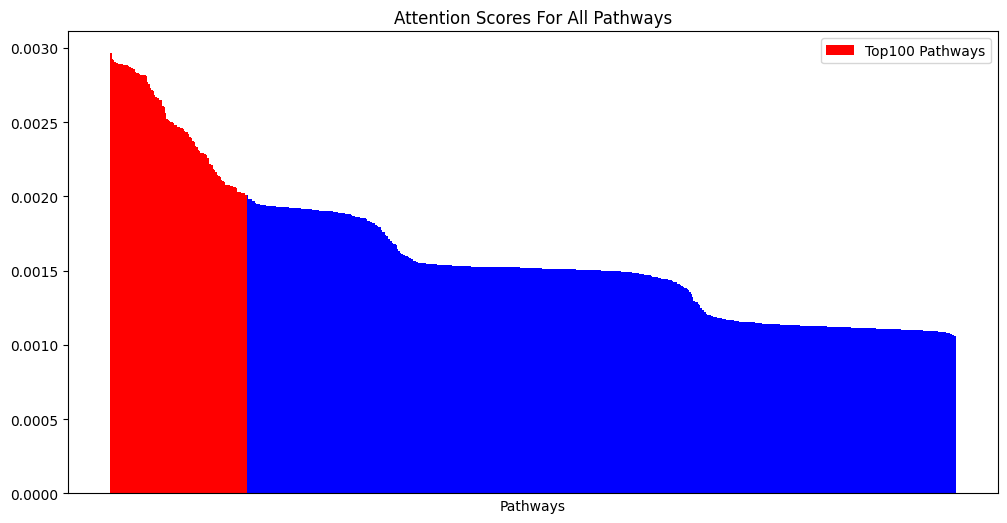

In [84]:
# 设置画布大小
plt.figure(figsize=(12, 6))
# 画出df_pathways_single_drug_mean的柱状图
plt.bar(df_pathways_single_drug_mean_merge['pathway_name'], df_pathways_single_drug_mean_merge['attention'], color=df_pathways_single_drug_mean_merge['color'],width=1)
# 在柱状图的中值上画一条竖线,在竖线上标注中值
# plt.vlines(309, 0, 0.0026, linestyles='dashed', colors='black', alpha=1)
# plt.text(309, 0.0026, 'Median', ha='center', va='bottom', fontsize=10)
# 在图中标注中值
# plt.text(309, 0.00262, 'Median: 0.001532', ha='center', va='bottom', fontsize=10)
# 画一个label：红色代表Target pathways
plt.bar([0], [0], color='r', label='Top100 Pathways')
# 将标签移到右下角
# 画一个label：蓝色代表Without Target pathways
# plt.bar([0], [0], color='b', label='Without Target pathways')
# 显示label
plt.legend()
# 打印出中值
print('中值:',df_pathways_single_drug_mean['attention'].median())
plt.title('Attention Scores For All Pathways')
plt.xticks([])
plt.xlabel('Pathways', fontsize=10)
# 保存图片
plt.savefig('Attention Scores For All Pathways.png', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
# 取df_pathways_single_drug_mean_merge前100个数据
df_pathways_top100 = df_pathways_single_drug_mean_merge.iloc[:100, :]
# 根据pathway_class分组，计算每组中的attention的均值
dfdf_pathways_top100_attention_score = df_pathways_top100.groupby('pathway_class')['attention'].mean()
dfdf_pathways_top100_attention_score.head()

pathway_class
AVP signaling                                    0.002818
Alzheimer disease                                0.002720
Amyotrophic lateral sclerosis                    0.002508
Autophagy                                        0.002870
Blood group carbohydrate antigen biosynthesis    0.002686
Name: attention, dtype: float64

In [54]:
# 将df_pathways_single_drug_mean_merge的前84个数据，按照pathway_class分组计数
df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge.index < 100].groupby('pathway_class').count()

,attention,pathway_name,Unnamed: 0,pathway_id,pathway_type,color
pathway_class,,,,,,
AVP signaling,1,1,1,1,1,1
Alzheimer disease,1,1,1,1,1,1
Amyotrophic lateral sclerosis,2,2,2,2,2,2
Autophagy,1,1,1,1,1,1
Blood group carbohydrate antigen biosynthesis,1,1,1,1,1,1
Breast cancer,1,1,1,1,1,1
CGAS-STING signaling,1,1,1,1,1,1
CRH-ACTH-cortisol signaling,4,4,4,4,4,4
Calcium signaling,5,5,5,5,5,5


In [55]:
# 将df_pathways_single_drug_mean_merge的前84个数据，按照pathway_class分组计数
df_counts = df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge.index < 100].groupby('pathway_class').count()
df_counts = df_counts.sort_values(by='attention', ascending=False)
# 取df_counts前两列
df_counts = df_counts.iloc[:, 0:1]
# 将第二列重命名为count
df_counts.columns = ['count']

# 将df_counts与df_pathways_top100_attention_score合并
df_counts = pd.merge(df_counts, dfdf_pathways_top100_attention_score, on='pathway_class')
df_counts

,count,attention
pathway_class,,
TGFB signaling,8,0.002462
NOTCH signaling,6,0.002407
Transcription,5,0.002594
PI3K signaling,5,0.002327
Spinocerebellar ataxia,5,0.002624
Calcium signaling,5,0.002655
Human cytomegalovirus (HCMV),4,0.002450
CRH-ACTH-cortisol signaling,4,0.002537
Cytoskeletal regulation (viruses and bacteria),3,0.002506


In [56]:
#挑选出pathway_class = [TGFB signaling,NOTCH signaling,PI3K signaling,Transcription,Cytoskeletal regulation (viruses and bacteria),DNA adduct formation,Complement cascade,WNT signaling,cAMP signaling,Purine salvage pathway]
# df_counts = df_counts[df_counts.index.isin(['TGFB signaling','NOTCH signaling','PI3K signaling','Transcription','Cytoskeletal regulation (viruses and bacteria)','DNA adduct formation','Complement cascade','WNT signaling','cAMP signaling','Purine salvage pathway'])]
# 将df_counts中pathway_class = Cytoskeletal regulation (viruses and bacteria),修改成Cytoskeletal regulation
# df_counts = df_counts.rename(index={'Cytoskeletal regulation (viruses and bacteria)':'Cytoskeletal regulation'})

In [57]:
#挑选出pathway_class = [TGFB signaling,PI3K signaling,NOTCH signaling,MAPK signaling,JAK-STAT signaling,Cytoskeletal regulation (viruses and bacteria),Nuclear receptor signaling,Necroptosis,TLR signaling,Calcium signaling,Transcription]
df_counts = df_counts[df_counts.index.isin(['TGFB signaling','PI3K signaling','NOTCH signaling','MAPK signaling','WNT signaling','DNA adduct formation','Transcription','Calcium signaling'])]
# 将df_counts中pathway_class = Cytoskeletal regulation (viruses and bacteria),修改成Cytoskeletal regulation
df_counts = df_counts.rename(index={'Cytoskeletal regulation (viruses and bacteria)':'Cytoskeletal regulation'})

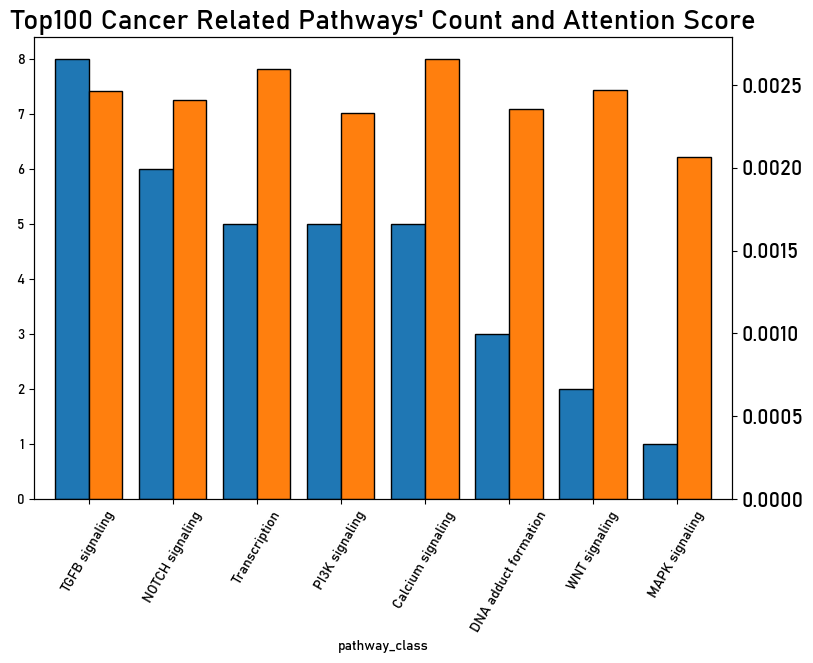

In [58]:
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 获取每个柱子的位置
x_positions = np.arange(len(df_counts))
# 画出df_counts的柱状图，每个pathway_class的count和attention
ax = df_counts.plot(kind='bar', secondary_y='attention', rot=60,figsize=(9, 6),legend=False,width=0.8, edgecolor='black')
# 找到最大值和最小值
# max_count = df_counts['count'].max()
# min_count = df_counts['count'].min()
# 
# max_attention = df_counts['attention'].max()
# min_attention = df_counts['attention'].min()

# 在柱状图顶部中间添加竖线
# for i, (count, attention) in enumerate(zip(df_counts['count'], df_counts['attention'])):
#     ax.plot([x_positions[i], x_positions[i]], [max_count, max_attention], color='k', linestyle='-', linewidth=0.5)
#     ax.plot([x_positions[i], x_positions[i]], [min_count, min_attention], color='k', linestyle='-', linewidth=0.5)
# 不显示label
plt.title('Top100 Cancer Related Pathways\' Count and Attention Score',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Pathway Class', fontsize=15)
# 保存图片
plt.savefig('Top100 Cancer Related Pathways Count and Attention Score Distribution', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
# 将df_counts的饼图画出，让count小于2的合并为others
df_counts['count'] = np.where(df_counts['count'] < 2, 'others', df_counts['count'])
df_counts

,count,attention
pathway_class,,
TGFB signaling,8,0.002462
NOTCH signaling,6,0.002407
Transcription,5,0.002594
PI3K signaling,5,0.002327
Calcium signaling,5,0.002655
DNA adduct formation,3,0.002353
WNT signaling,2,0.002471
MAPK signaling,others,0.002064


ValueError: could not convert string to float: 'others'

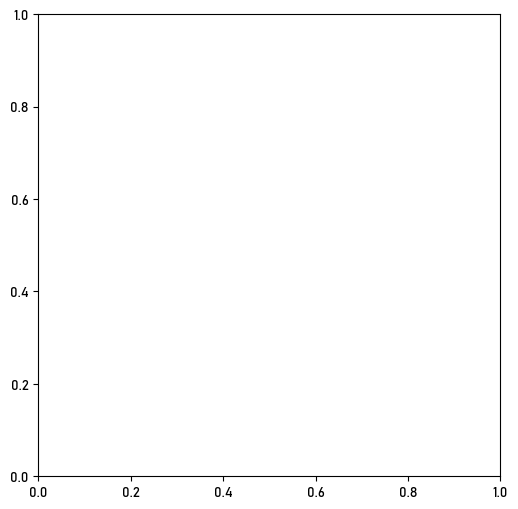

In [61]:
# 画出饼图
plt.figure(figsize=(6, 6))
plt.pie(df_counts['count'], labels=df_counts.index, autopct='%1.1f%%')
plt.title('Pathway Class Distribution')
# 保存图片
# plt.savefig('NSCLC_Pathway_Class_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# 将df_pathways_single_drug_mean_merge的前84个数据，按照pathway_type分组计数
df_pathways_single_drug_mean_merge[df_pathways_single_drug_mean_merge.index < 84].groupby('pathway_type').count()

,attention,pathway_name,Unnamed: 0,pathway_id,pathway_class,color
pathway_type,,,,,,
Env factor,4,4,4,4,4,4
Pathogen,7,7,7,7,7,7
Reference,56,56,56,56,56,56
Variant,17,17,17,17,16,17
